In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
N = 100
student_ids = np.arange(1, N+1)

genders = np.random.choice(["M", "F", "Male", "Female", "m", "f"], size=N,
                           p=[0.3, 0.3, 0.1, 0.1, 0.1, 0.1])

ages = np.random.randint(15, 23, size=N)
math_scores = np.random.randint(50, 101, size=N)
reading_scores = np.random.randint(50, 101, size=N)
writing_scores = np.random.randint(50, 101, size=N)
# Generate 'Attendance' using a beta distribution for skewness and scale to percent
attendance = np.random.beta(2, 5, size=N) * 100

# Build the DataFrame
df = pd.DataFrame({
    "Student_ID": student_ids,
    "Gender": genders,
    "Age": ages,
    "Math_Score": math_scores,
    "Reading_Score": reading_scores,
    "Writing_Score": writing_scores,
    "Attendance": attendance
})

# Introduce Missing Values (approximately 5% in each numeric column)
for col in ["Math_Score", "Reading_Score", "Writing_Score", "Attendance"]:
    df.loc[df.sample(frac=0.05).index, col] = np.nan


df.loc[df.sample(frac=0.03).index, "Gender"] = "Unknown"

print("Initial DataFrame (first 5 rows):")
print(df.head())


Initial DataFrame (first 5 rows):
   Student_ID  Gender  Age  Math_Score  Reading_Score  Writing_Score  \
0           1       F   21        82.0           70.0          100.0   
1           2       f   22        50.0           97.0           72.0   
2           3  Female   21        68.0           69.0           64.0   
3           4       F   15        51.0           57.0           77.0   
4           5       M   18        93.0           56.0            NaN   

   Attendance  
0   49.988370  
1   38.398278  
2   32.505678  
3   24.618002  
4   30.326515  


In [4]:
# Check for missing values in each column
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# For numeric columns: We impute missing values using the median value.
num_cols = ["Math_Score", "Reading_Score", "Writing_Score", "Attendance"]
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# For any entry not mapping to "Male" or "Female" (e.g., "Unknown"), we set it to the mode.
gender_mapping = {"M": "Male", "m": "Male", "Male": "Male",
                  "F": "Female", "f": "Female", "Female": "Female"}
df['Gender'] = df['Gender'].replace(gender_mapping)

# Replace any remaining inconsistent values with the mode of the Gender column
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].apply(lambda x: gender_mode if x not in ["Male", "Female"] else x)

print("\nDataFrame after handling missing values and inconsistencies (first 5 rows):")
print(df.head())


Missing values before cleaning:
Student_ID       0
Gender           0
Age              0
Math_Score       5
Reading_Score    5
Writing_Score    5
Attendance       5
dtype: int64

DataFrame after handling missing values and inconsistencies (first 5 rows):
   Student_ID  Gender  Age  Math_Score  Reading_Score  Writing_Score  \
0           1  Female   21        82.0           70.0          100.0   
1           2  Female   22        50.0           97.0           72.0   
2           3  Female   21        68.0           69.0           64.0   
3           4  Female   15        51.0           57.0           77.0   
4           5    Male   18        93.0           56.0           75.0   

   Attendance  
0   49.988370  
1   38.398278  
2   32.505678  
3   24.618002  
4   30.326515  


<ipython-input-4-fbd9928671a5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [5]:

# Define the numeric columns to check for outliers.
numeric_cols = ["Age", "Math_Score", "Reading_Score", "Writing_Score", "Attendance"]

# Use the Interquartile Range (IQR) method to detect outliers:
# Outlier thresholds: lower_bound = Q1 - 1.5 * IQR, upper_bound = Q3 + 1.5 * IQR.
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{col}: Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR:.2f}")
    print(f"Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}")

    # Cap values below the lower bound to the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # Cap values above the upper bound to the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("\nDataFrame after outlier treatment (first 5 rows):")
print(df.head())


Age: Q1 = 16.75, Q3 = 20.0, IQR = 3.25
Lower bound = 11.88, Upper bound = 24.88

Math_Score: Q1 = 62.5, Q3 = 84.0, IQR = 21.50
Lower bound = 30.25, Upper bound = 116.25

Reading_Score: Q1 = 69.75, Q3 = 87.25, IQR = 17.50
Lower bound = 43.50, Upper bound = 113.50

Writing_Score: Q1 = 65.0, Q3 = 86.0, IQR = 21.00
Lower bound = 33.50, Upper bound = 117.50

Attendance: Q1 = 17.9158284214096, Q3 = 42.246554769483666, IQR = 24.33
Lower bound = -18.58, Upper bound = 78.74

DataFrame after outlier treatment (first 5 rows):
   Student_ID  Gender   Age  Math_Score  Reading_Score  Writing_Score  \
0           1  Female  21.0        82.0           70.0          100.0   
1           2  Female  22.0        50.0           97.0           72.0   
2           3  Female  21.0        68.0           69.0           64.0   
3           4  Female  15.0        51.0           57.0           77.0   
4           5    Male  18.0        93.0           56.0           75.0   

   Attendance  
0   49.988370  
1   38.


Skewness before and after log transformation on Attendance:
Skewness of Attendance:  0.3904420453400878
Skewness of Log_Attendance:  -1.2467217864815512


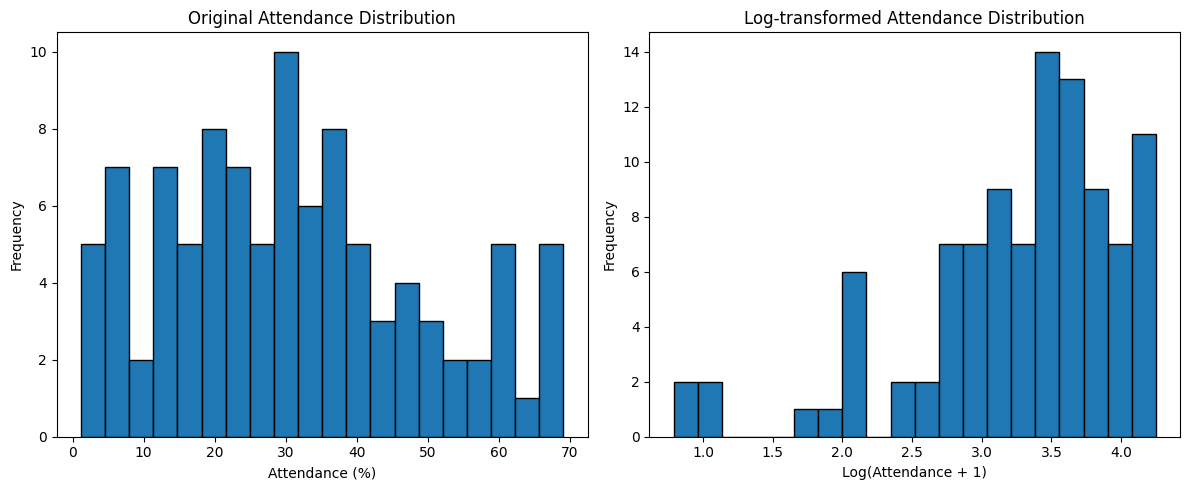

In [6]:
df['Log_Attendance'] = np.log1p(df['Attendance'])

# Display the effect: compare skewness before and after transformation.
print("\nSkewness before and after log transformation on Attendance:")
print("Skewness of Attendance: ", df['Attendance'].skew())
print("Skewness of Log_Attendance: ", df['Log_Attendance'].skew())

# Plotting the distributions to visualize the transformation effect
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Attendance'], bins=20, edgecolor='black')
plt.title('Original Attendance Distribution')
plt.xlabel('Attendance (%)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Log_Attendance'], bins=20, edgecolor='black')
plt.title('Log-transformed Attendance Distribution')
plt.xlabel('Log(Attendance + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()